In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

# Path to the dataset folder
dataset_folder = 'D:\\Downloads-D\\Bala.Ai\\datasets\\Alopecia'

# List all image files in the dataset folder
image_files = [f for f in os.listdir(dataset_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

In [ ]:
# Iterate through each image file
for image_file in image_files[:4]:
    image_path = os.path.join(dataset_folder, image_file)
    
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Could not load {image_file}. Skipping...")
        continue

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(image)

    

    # Optional: Display the original and enhanced images side by side for comparison
    combined_display = cv2.hconcat([image, enhanced_image])
    cv2.imshow("Original vs Enhanced", combined_display)
    cv2.waitKey(0)  # Press any key to move to the next image

# Close all OpenCV windows after processing
cv2.destroyAllWindows()


Image: 1320__WatermarkedWyJXYXRlcm1hcmtlZCJd.jpg
Normal Hair Area: 0.26
Low-Density Hair Area: 0.34
Bald Area: 0.40
Severity Index: 1.13 - Severe


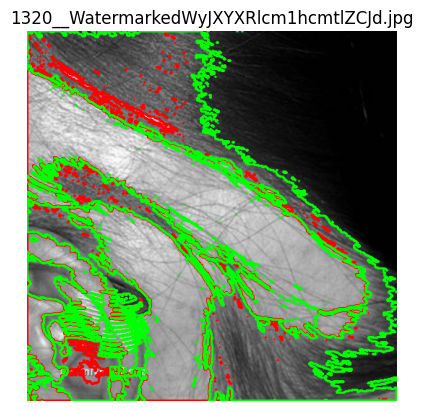

Image: 1321__WatermarkedWyJXYXRlcm1hcmtlZCJd.jpg
Normal Hair Area: 0.26
Low-Density Hair Area: 0.43
Bald Area: 0.31
Severity Index: 1.05 - Severe


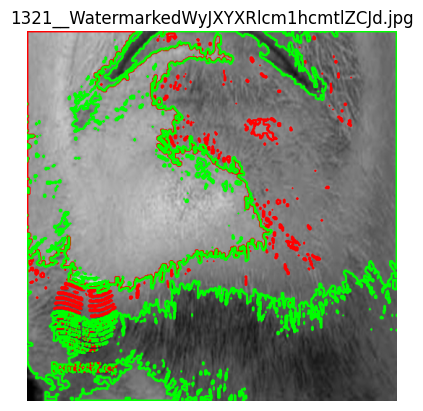

Image: 1322__WatermarkedWyJXYXRlcm1hcmtlZCJd.jpg
Normal Hair Area: 0.49
Low-Density Hair Area: 0.26
Bald Area: 0.25
Severity Index: 0.76 - Severe


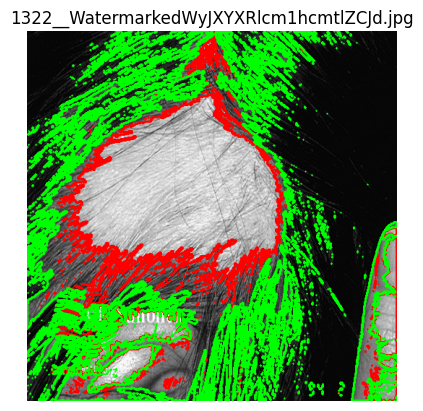

Image: 1323__WatermarkedWyJXYXRlcm1hcmtlZCJd.jpg
Normal Hair Area: 0.43
Low-Density Hair Area: 0.37
Bald Area: 0.21
Severity Index: 0.78 - Severe


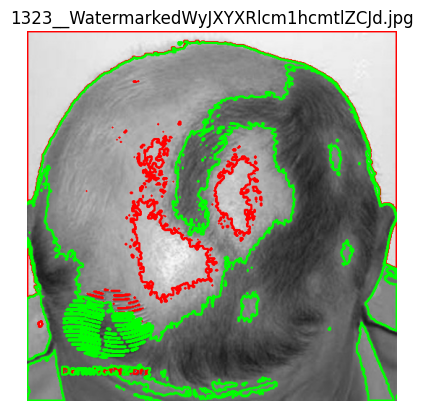

In [2]:
for image_file in image_files[:4]:  # Limit to the first 4 images
    image_path = os.path.join(dataset_folder, image_file)
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Could not load {image_file}. Skipping...")
        continue
     
    # Resize the image for consistency
    image_resized = cv2.resize(image, (512, 512))

    # Flatten the image for k-means clustering
    pixel_values = image_resized.reshape((-1, 1))
    pixel_values = np.float32(pixel_values)

    # Apply k-means clustering to segment the image into 3 clusters
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(pixel_values)
    labels = kmeans.labels_.reshape(image_resized.shape)

    # Identify the clusters for normal, low-density, and bald areas
    cluster_centers = kmeans.cluster_centers_.flatten()
    sorted_indices = np.argsort(cluster_centers)

    normal_cluster = sorted_indices[0]
    low_density_cluster = sorted_indices[1]
    bald_cluster = sorted_indices[2]

    # Create masks for each cluster
    normal_mask = (labels == normal_cluster).astype(np.uint8) * 255
    low_density_mask = (labels == low_density_cluster).astype(np.uint8) * 255
    bald_mask = (labels == bald_cluster).astype(np.uint8) * 255

    # Outline the bald patches
    contours, _ = cv2.findContours(bald_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    outlined_image = cv2.cvtColor(image_resized, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(outlined_image, contours, -1, (0, 0, 255), 2)  # Red outline for bald patches

    # Optional: Outline the low-density patches as well
    contours_low_density, _ = cv2.findContours(low_density_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(outlined_image, contours_low_density, -1, (0, 255, 0), 2)  # Green outline for low-density patches

    # Quantify the areas of each cluster
    total_pixels = labels.size
    normal_area = np.sum(labels == normal_cluster) / total_pixels
    low_density_area = np.sum(labels == low_density_cluster) / total_pixels
    bald_area = np.sum(labels == bald_cluster) / total_pixels

    # Quantify severity based on bald and low-density regions
    severity_index = (bald_area * 2 + low_density_area)

    # Categorize the severity
    if severity_index < 0.3:
        severity = "Mild"
    elif severity_index < 0.6:
        severity = "Moderate"
    else:
        severity = "Severe"

    # Display results
    print(f"Image: {image_file}")
    print(f"Normal Hair Area: {normal_area:.2f}")
    print(f"Low-Density Hair Area: {low_density_area:.2f}")
    print(f"Bald Area: {bald_area:.2f}")
    print(f"Severity Index: {severity_index:.2f} - {severity}")

    # Show the outlined image using Matplotlib
    plt.imshow(cv2.cvtColor(outlined_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.axis('off')  # Hide axis
    plt.title(image_file)  # Display the image title
    plt.show() 

Clustering:
The code uses k-means clustering to divide the image into three clusters: normal hair, low-density, and bald regions.

Identifying Clusters:
Cluster centers are sorted based on intensity values to ensure that the lowest intensity (darkest) cluster corresponds to bald patches.

Mask Creation:
Masks are generated for each cluster (normal, low-density, bald) to isolate these regions.
Contour Detection:

The cv2.findContours function finds the contours of bald regions and outlines them in red. Similarly, low-density regions are outlined in green.

Quantification:
It calculates the percentage of each region (normal, low-density, bald) relative to the total pixels and computes a severity index based on these values.

Displaying Results:
The processed image is displayed with the outlined bald and low-density regions.